In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap
raw_path = "C:\\Users\\janwe\\OneDrive\\Dokumente\\Projekte\\Star_Wars_Legion_Rabbit\\01_data\\01_raw"
preprocessed_path = "C:\\Users\\janwe\\OneDrive\Dokumente\\Projekte\\Star_Wars_Legion_Rabbit\\01_data\\02_processed"

excel_pd = pd.read_excel(raw_path+"\Liga.xlsx",index_col=0,sheet_name='Spiele')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
excel_pd['Gewinner_Fraktion'] = np.select(
    [
        excel_pd['Spieler_1'] == excel_pd['Gewinner'], 
        excel_pd['Spieler_2'] == excel_pd['Gewinner']
    ], 
    [
        excel_pd['Fraktion_Spieler_1'], 
        excel_pd['Fraktion_Spieler_2']
    ], 
    default=None
)

In [3]:
excel_pd['Looser_Fraktion'] = np.select(
    [
        excel_pd['Spieler_1'] == excel_pd['Gewinner'], 
        excel_pd['Spieler_2'] == excel_pd['Gewinner']
    ], 
    [
        excel_pd['Fraktion_Spieler_2'], 
        excel_pd['Fraktion_Spieler_1']
    ], 
    default=None
)

In [4]:
excel_pd.head(60)

,Spieltag,Spieler_1,Fraktion_Spieler_1,Spieler_2,Fraktion_Spieler_2,Gewinner,Gewinner_Fraktion,Looser_Fraktion
Planet,,,,,,,,
Hoth,Spieltag 1,Jan W.,Rebellen,Kevin,Imperium,Kevin,Imperium,Rebellen
Hoth,Spieltag 1,Krauti,Seperatisten,Matu,Klone,Krauti,Seperatisten,Klone
Hoth,Spieltag 1,Mustafa,Klone,Robin,Imperium,Robin,Imperium,Klone
Hoth,Spieltag 2,Robin,NaN,Krauti,NaN,NaN,None,None
Hoth,Spieltag 2,Mustafa,Klone,Jan W.,Rebellen,Mustafa,Klone,Rebellen
Hoth,Spieltag 2,Kevin,Imperium,Matu,Seperatisten,Kevin,Imperium,Seperatisten
Hoth,Spieltag 3,Mustafa,Klone,Robin,Imperium,Robin,Imperium,Klone
Hoth,Spieltag 3,Kevin,Rebellen,Krauti,Seperatisten,Krauti,Seperatisten,Rebellen
Hoth,Spieltag 3,Matu,Seperatisten,Jan W.,Schattenkollektiv,Jan W.,Schattenkollektiv,Seperatisten


In [5]:
factions_winner = excel_pd['Gewinner_Fraktion'].unique()
factions_looser = excel_pd['Looser_Fraktion'].unique()

In [6]:
unique_factions = np.concatenate([factions_winner,factions_looser])

In [7]:
unique_factions = unique_factions[unique_factions != np.array(None)]

In [8]:
unique_factions = np.unique(unique_factions)

In [9]:
unique_factions = np.sort(unique_factions)

In [10]:
unique_factions 

array(['Imperium', 'Klone', 'Rebellen', 'Schattenkollektiv',
       'Seperatisten'], dtype=object)

In [11]:
idx = unique_factions
cols = unique_factions

In [12]:
array = []
for win_faction in unique_factions:
    row = []
    for looser_faction  in unique_factions:
        wins = sum(np.select(
            [
                (excel_pd['Gewinner_Fraktion'] ==win_faction) &
                (excel_pd['Looser_Fraktion'] == looser_faction)
            ], 
            [
                1
            ], 
                default=0
        ))
        loss = sum(np.select(
            [
                (excel_pd['Gewinner_Fraktion'] ==looser_faction) &
                (excel_pd['Looser_Fraktion'] == win_faction)
            ], 
            [
                1
            ], 
                default=0
        ))
        ratio = wins/(wins+loss)
        row.append(ratio)
    array.append(row)

C:\Users\janwe\OneDrive\Dokumente\Projekte\Star_Wars_Legion_Rabbit\venv\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


In [13]:
df = pd.DataFrame(array,
                   columns = cols, index = idx)

In [29]:
df.to_csv(preprocessed_path + '\\faction.csv')

In [14]:
df

,Imperium,Klone,Rebellen,Schattenkollektiv,Seperatisten
Imperium,NaN,1.0,1.0,1.0,1.0
Klone,0.0,NaN,0.5,0.0,0.0
Rebellen,0.0,0.5,NaN,1.0,0.0
Schattenkollektiv,0.0,1.0,0.0,NaN,1.0
Seperatisten,0.0,1.0,1.0,0.0,NaN


In [44]:
cmap=LinearSegmentedColormap.from_list('rg',["r","y", "g"], N=256) 

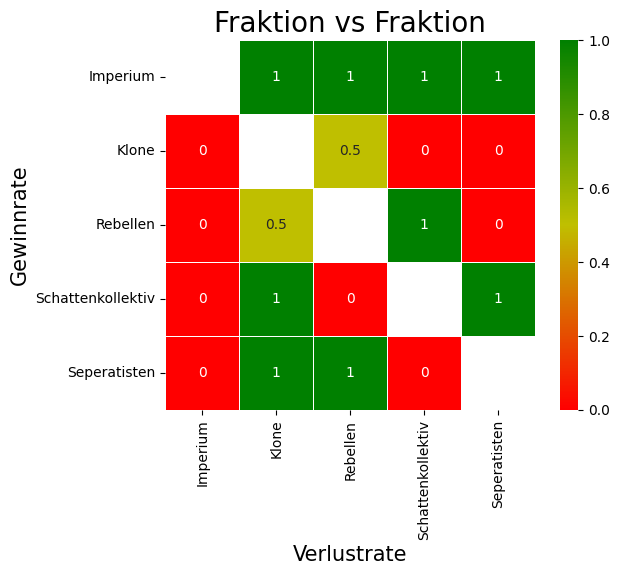

In [45]:
ax = sns.heatmap(df, annot=True, linewidth=.5, cmap = cmap, square = True)
plt.title('Fraktion vs Fraktion', fontsize = 20) # title with fontsize 20
plt.xlabel('Verlustrate', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Gewinnrate', fontsize = 15) # y-axis label with fontsize 15

plt.show()